In [15]:
from google.colab import drive
drive.mount('drive',force_remount=True)


Mounted at drive


In [1]:
!pip install tensorflow -U


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [52]:
import json

with open('drive/MyDrive/train/garbage_dict.json', 'r') as file:
    class_dict = json.load(file)



In [51]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Load MobileNetV2 without the top layer
base_model.trainable = False  # Freeze the convolutional base

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
predictions = Dense(len(class_dict), activation='softmax')(x)  # New softmax layer for classification

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/train/train/',
    target_size=(224, 224),  # Size expected by MobileNetV2
    batch_size=32,
    class_mode='categorical')


Found 14426 images belonging to 40 classes.


In [41]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=50,  # Adjust based on your dataset size
    epochs=3)  # Adjust based on your needs


Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 410s 7s/step - accuracy: 0.2709 - loss: 2.9920
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 311s 6s/step - accuracy: 0.5704 - loss: 1.4740
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.6300 - loss: 1.2796


In [46]:
model.save('my_model_tl.h5')  # Saves the model


**Evaluation**

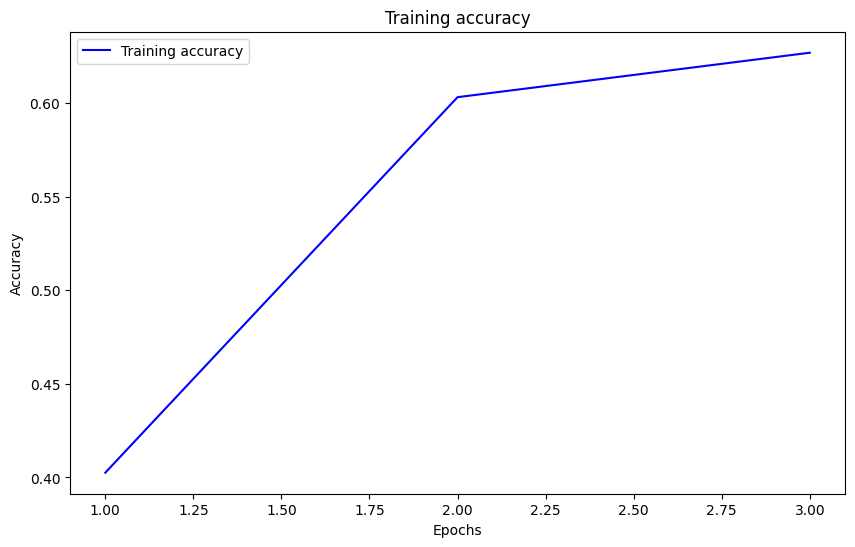

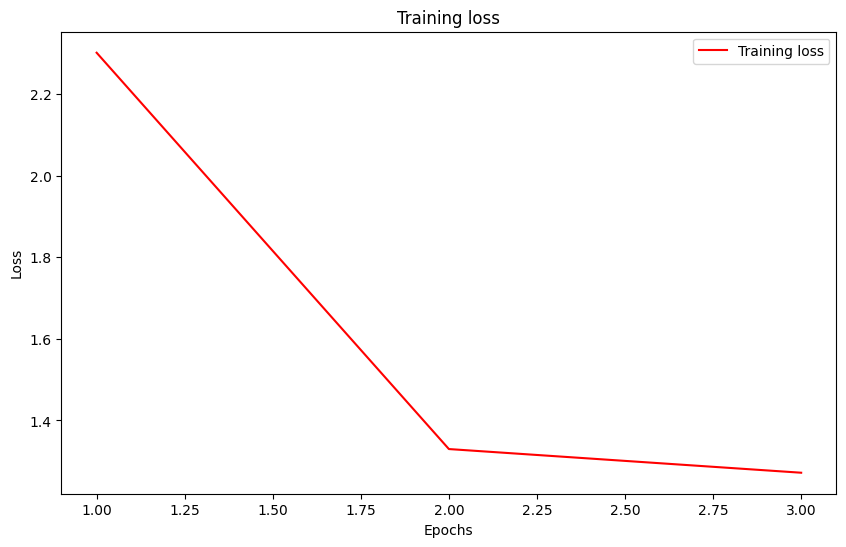

In [47]:
import matplotlib.pyplot as plt

# Assuming `history` is the History object returned by the `model.fit()` method.
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [55]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('my_model_tl.h5')


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims / 255.

import os

test_images_dir = 'drive/MyDrive/newtest/'
test_images = os.listdir(test_images_dir)

for img_name in test_images:
    img_path = os.path.join(test_images_dir, img_name)
    preprocessed_img = load_and_preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction, axis=1)
    print(f"Image: {img_name}, Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: test303.jpg, Predicted class: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: img_18592.jpg, Predicted class: [31]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: test320.jpg, Predicted class: [16]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: img_2135.jpg, Predicted class: [35]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image: test14.jpg, Predicted class: [15]
